In [0]:
!wget ftp://wasserstoff.informatik.rwth-aachen.de/pub/rwth-boston-104/rwth-boston-104.tar.gz

In [0]:
import os
os.listdir()
os.mkdir('data')
os.chdir("/content/data")
import tarfile
fname='/content/rwth-boston-104.tar.gz'
tar = tarfile.open(fname, "r:gz")
tar.extractall()

In [0]:
import tarfile
fname='/content/data/rwth-boston-104/png-segments.tar.gz'
tar = tarfile.open(fname, "r:gz")
tar.extractall()

In [0]:
import pandas as pd
test_data=pd.read_csv("/content/data/rwth-boston-104/corpus/test.sentences.multi.translations.csv",delimiter=';', error_bad_lines=False)
train_data=pd.read_csv("/content/data/rwth-boston-104/corpus/train.sentences.pronunciations.multi.translations.csv",delimiter=';', error_bad_lines=False)

In [0]:
print("train size :",train_data.shape)
print("test size  :",test_data.shape)

train size : (161, 8)
test size  : (40, 8)


In [0]:
train_data.head()

,name,video,start,end,speaker,orth,translation,Unnamed: 7
0,1,001_,-1,-1,woman-1,[SILENCE] JOHN WRITE HOMEWORK [SILENCE],John writes his homework.,NaN
1,3,003_,-1,-1,woman-2,[SILENCE] IX-1P SEE JOHN YESTERDAY IX [SILENCE],I visited John there yesterday.,NaN
2,4,004_,-1,-1,woman-1,[SILENCE] JOHN IX-1P SEE IX YESTERDAY [SILENCE],I visited John there yesterday.,NaN
3,5,005_,-1,-1,woman-2,[SILENCE] LOVE MARY JOHN [SILENCE],Mary loves John.,NaN
4,6,006_,-1,-1,woman-2,[SILENCE] LOVE MARY JOHN IX [SILENCE],Mary loves John.,NaN


In [0]:
cols = ['speaker','orth','video']
train = train_data[cols]
test = test_data[cols]
train.head()

,speaker,orth,video
0,woman-1,[SILENCE] JOHN WRITE HOMEWORK [SILENCE],001_
1,woman-2,[SILENCE] IX-1P SEE JOHN YESTERDAY IX [SILENCE],003_
2,woman-1,[SILENCE] JOHN IX-1P SEE IX YESTERDAY [SILENCE],004_
3,woman-2,[SILENCE] LOVE MARY JOHN [SILENCE],005_
4,woman-2,[SILENCE] LOVE MARY JOHN IX [SILENCE],006_


In [0]:
test.head()

,speaker,orth,video
0,woman-1,[SILENCE] JOHN WRITE HOMEWORK [SILENCE],002_
1,man-1,[SILENCE] JOHN CAN GO CAN [SILENCE],007_
2,woman-2,[SILENCE] JOHN CAN GO CAN [SILENCE],012_
3,woman-2,[SILENCE] JOHN FISH WONT EAT BUT CAN EAT CHICK...,021_
4,woman-2,[SILENCE] JOHN LIKE IX IX IX [SILENCE],025_


In [0]:
test.tail()

,speaker,orth,video
35,man-1,[SILENCE] ALL BOY GIVE TEACHER APPLE [SILENCE],184_
36,man-1,[SILENCE] JOHN GIVE GIRL BOX [SILENCE],189_
37,man-1,[SILENCE] JOHN GIVE GIRL BOX [SILENCE],193_
38,woman-1,[SILENCE] LIKE CHOCOLATE WHO [SILENCE],199_
39,woman-2,[SILENCE] JOHN TELL MARY IX-1P BUY HOUSE [SILE...,201_


#prepocessing for finding the sentence

In [0]:
import pandas as pd
import numpy as np

#train = pd.read_csv(args['train'])
train_gloss_sentences = train['orth'].tolist()
ved = train['video'].tolist()
train_gloss_words = np.array([sentences.split(' ') for sentences in train_gloss_sentences])
all_words = np.unique(np.ravel(np.array(train_gloss_words)))

#inp = args['sentence'].split(' ')
inp = 'JOHN GIVE GIRL BOX'
inp = inp.split(' ')
for word in inp:
    if word not in all_words is True:
        print("there is an unexected word that is is not in training dataset")
        sys.exit()

def get_sentences_from_train(words):
  data = []
  for i in words:
    count = 0
    sentences = []
    position_of_sentence = []
    for k,j in enumerate(train_gloss_words):
        if i in j:
          count = count + 1
          #print(count)
          position_of_sentence.append(ved[k])
          sentences.append(train_gloss_sentences[k])
    data.append([i,sentences,position_of_sentence,count])
  return data
total_data_words =get_sentences_from_train(inp)
for i in range(len(inp)):
  print('_____________________________________________________________________________________')
  print('\n')
  print('required word'.ljust(40, '-'),total_data_words[i][0])
  print('found in sentence'.ljust(40, '-'),total_data_words[i][1][0])
  print('position in train dataset'.ljust(40, '-'),total_data_words[i][2][0])


_____________________________________________________________________________________


required word--------------------------- JOHN
found in sentence----------------------- [SILENCE] JOHN WRITE HOMEWORK [SILENCE]
position in train dataset--------------- 001_
_____________________________________________________________________________________


required word--------------------------- GIVE
found in sentence----------------------- [SILENCE] JOHN GIVE IX MAN IX NEW COAT [SILENCE]
position in train dataset--------------- 087_
_____________________________________________________________________________________


required word--------------------------- GIRL
found in sentence----------------------- [SILENCE] IX GIRL GIVE JOHN BOX [SILENCE]
position in train dataset--------------- 185_
_____________________________________________________________________________________


required word--------------------------- BOX
found in sentence----------------------- [SILENCE] IX GIRL GIVE JOHN BOX 

#OpenPose

In [0]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if  exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

In [0]:
video = np.unique([1,87,185,185])
for no,file in enumerate(video):
  f = format(file, "03")
  path = '/content/data/png-segments/'+'{}'.format(f)
  print(path)
  jsn = '/content/'+str(no)
  !cd openpose && ./build/examples/openpose/openpose.bin --image_dir $path  --display 0 --face --hand --write_images $jsn  --disable_blending --alpha_pose 1 --write_json $jsn --part_candidates --model_pose BODY_25
  print('----------------------------------------')

/content/data/png-segments/001
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 23.108684 seconds.
----------------------------------------
/content/data/png-segments/087
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 29.900379 seconds.
----------------------------------------
/content/data/png-segments/185
Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 21.504658 seconds.
----------------------------------------


In [0]:
!pip install natsort
!pip install dtw

In [0]:
from random import shuffle
from glob import glob
import natsort
import json
import matplotlib.pyplot as plt

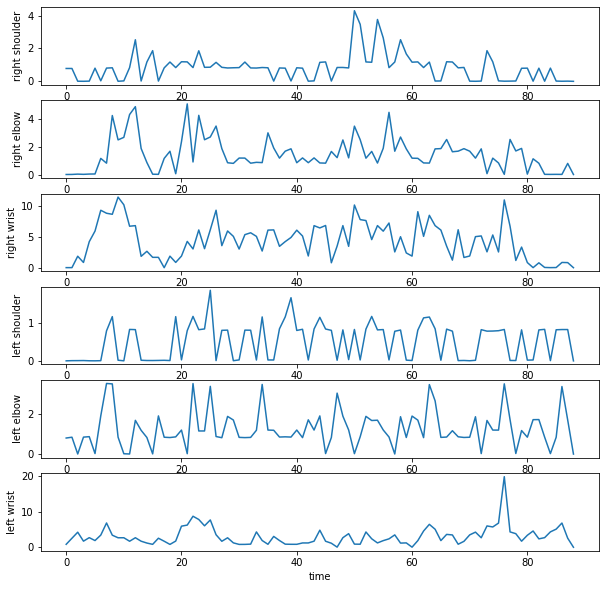

In [0]:
path = '/content/0/'
def getjoints(jsonfile):
  with open(jsonfile) as datafile:
    data = json.load(datafile)
  data2=np.array(data['part_candidates'][0]['2']) #right shoulder
  data3=np.array(data['part_candidates'][0]['3']) #right elbow
  data4=np.array(data['part_candidates'][0]['4']) #right Wrist
  data5=np.array(data['part_candidates'][0]['5']) #left shoulder
  data6=np.array(data['part_candidates'][0]['6']) #left elbow
  data7=np.array(data['part_candidates'][0]['7']) #left Wrist
  x = [data2[0],data3[0],data4[0],data5[0],data6[0],data7[0]]
  y = [data2[1],data3[1],data4[1],data5[1],data6[1],data7[1]]
  return((x,y))
#x,y = getjoints('/content/sk201/images0001_keypoints.json')
tx = []
ty = []

for i in natsort.natsorted(glob(path+ '*.json')):
  x,y = getjoints(i)
  tx.append(x)
  ty.append(y)

d = []
for i in range(1,len(tx)):
  d.append(np.sqrt(((np.array(tx[i-1])-np.array(tx[i]))**2)+((np.array(ty[i-1])-np.array(ty[i]))**2)))

d0 = [d[i][0] for i in range(len(d))]
d1 = [d[i][1] for i in range(len(d))]
d2 = [d[i][2] for i in range(len(d))]
d3 = [d[i][3] for i in range(len(d))]
d4 = [d[i][4] for i in range(len(d))]
d5 = [d[i][5] for i in range(len(d))]

body = {1:'right shoulder',
        2:'right elbow',
        3:'right wrist',
        4:'left shoulder',
        5:'left elbow',
        6:'left wrist'}

dd= [d0,d1,d2,d3,d4,d5]
fig = plt.figure(figsize=(10, 10))

for num in range(1,7):
    ax = fig.add_subplot(6,1,num)
    ax.plot(dd[num-1])
    plt.xlabel('time')
    plt.ylabel(body[num])
    
#plt.tight_layout()
plt.show()

#Dynamic time wraping

In [0]:
%matplotlib inline

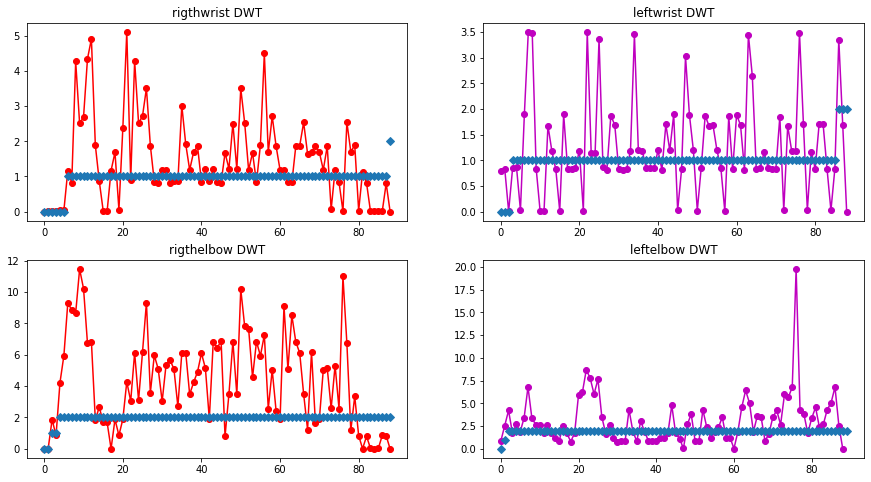

In [0]:
inp_sent = 'JOHN WRITE HOMEWORK' #for o folder

#dynamic time wrapping
from dtw import dtw

y = np.arange(len(inp_sent.split(' '))) #[0,1,2]
x1 = np.array(d1).reshape(-1, 1)
euclidean_norm = lambda x1, y: np.abs(x1 - y)
d, cost_matrix, acc_cost_matrix, path = dtw(x1, y, dist=euclidean_norm)
rightwrist = path[1]

x2 = np.array(d4).reshape(-1, 1) 
euclidean_norm = lambda x2, y: np.abs(x2 - y)
d, cost_matrix, acc_cost_matrix, path = dtw(x2, y, dist=euclidean_norm)
leftwrist = path[1]

x3 = np.array(d2).reshape(-1, 1) 
euclidean_norm = lambda x3, y: np.abs(x3 - y)
d, cost_matrix, acc_cost_matrix, path = dtw(x3, y, dist=euclidean_norm)
rightelbow = path[1]

x4 = np.array(d5).reshape(-1, 1) 
euclidean_norm = lambda x4, y: np.abs(x4 - y)
d, cost_matrix, acc_cost_matrix, path = dtw(x4, y, dist=euclidean_norm)
leftelbow = path[1]


plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
plt.plot(d1,'-or',label = 'rightwrist')
plt.plot(rightwrist,'D',label = 'dwt')
plt.title('rigthwrist DWT')

plt.subplot(2,2,2)
plt.plot(d4,'-om')
plt.plot(leftwrist,'D')
plt.title('leftwrist DWT')

plt.subplot(2,2,3)
plt.plot(d2,'-or')
plt.plot(rightelbow,'D')
plt.title('rigthelbow DWT')

plt.subplot(2,2,4)
plt.plot(d5,'-om')
plt.plot(leftelbow,'D')
plt.title('leftelbow DWT')
#plt.legend()
plt.show()

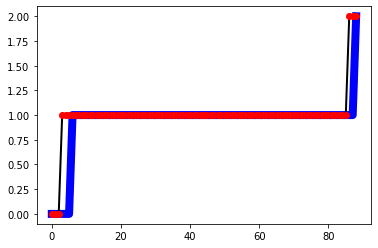

In [0]:
plt.plot(rightwrist,c='b',linewidth=8)
plt.plot(leftwrist,c='k',linewidth=2)
plt.plot(np.maximum(np.array(rightwrist),np.array(leftwrist)),'or')
plt.show()

In [0]:
final = np.maximum(np.array(rightwrist),np.array(leftwrist))
f = {v:sen for v, sen in enumerate(inp_sent.split(' '))}
frames_data = [f[i] for i in final]
word = 'JOHN'
frames_data_pos = [j for j,i in enumerate(frames_data) if i == word] #prints [0,1,2]

#PIX TO PIX GAN

In [0]:
os.chdir('/content')

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d saisriteja/project1

 53% 17.0M/32.3M [00:00<00:00, 23.1MB/s]
100% 32.3M/32.3M [00:00<00:00, 47.1MB/s]


In [0]:
!unzip project1.zip

In [0]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import os
import time

from matplotlib import pyplot as plt
from IPython import display

TensorFlow 2.x selected.


In [0]:
def resi(path):
  for i in (os.listdir(path)):
    p = path+'/'+i
    img = Image.open(p)
    out = img.resize((512,256))
    cv2.imwrite(p,np.array(out))
resi('/content/new/test')
resi('/content/new/train')
resi('/content/new/val')

def resi(path):
  for i in (os.listdir(path)):
    p = path+'/'+i
    img = Image.open(p)
    box = (0,0,512,200)
    region = img.crop(box)    
    out = region.resize((512,256))
    cv2.imwrite(p,np.array(out))
resi('/content/new/test')
resi('/content/new/train')
resi('/content/new/val')

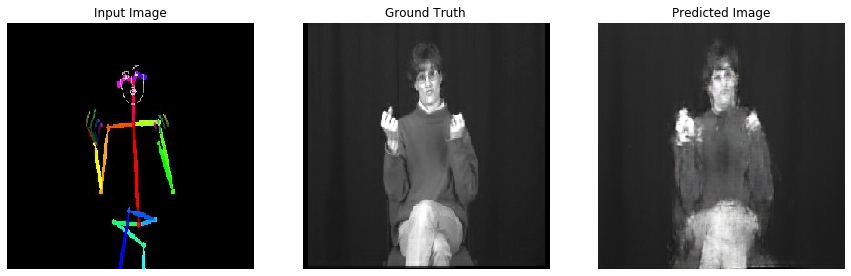

Epoch:  27
............................................................

In [0]:
BUFFER_SIZE = 400
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

from PIL import Image
import cv2
import numpy as np
PATH = '/content/new'
def load(image_file):
  
  image = tf.io.read_file(image_file) 
  image = tf.image.decode_jpeg(image)

  w = tf.shape(image)[1]

  w = w // 2
  print(w)
  real_image = image[:, :w, :]
  input_image = image[:, w:, :]

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image
inp, re = load(PATH+'/train/image370.jpg')
print(inp.shape)
# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(inp/255.0)
plt.figure()
plt.imshow(re/255.0)

def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

# normalizing the images to [-1, 1]

def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image
@tf.function()
def random_jitter(input_image, real_image):
  # resizing to 286 x 286 x 3
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # randomly cropping to 256 x 256 x 3
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image


plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i+1)
  print(rj_inp.shape)
  plt.imshow(rj_inp/255.0)
  #plt.axis('off')
plt.show()
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image
train_dataset = tf.data.Dataset.list_files(PATH+'/train/*.jpg')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.list_files(PATH+'/val/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)
OUTPUT_CHANNELS = 3
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)
def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False), # (bs, 128, 128, 64)
    downsample(128, 4), # (bs, 64, 64, 128)
    downsample(256, 4), # (bs, 32, 32, 256)
    downsample(512, 4), # (bs, 16, 16, 512)
    downsample(512, 4), # (bs, 8, 8, 512)
    downsample(512, 4), # (bs, 4, 4, 512)
    downsample(512, 4), # (bs, 2, 2, 512)
    downsample(512, 4), # (bs, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
    upsample(512, 4), # (bs, 16, 16, 1024)
    upsample(256, 4), # (bs, 32, 32, 512)
    upsample(128, 4), # (bs, 64, 64, 256)
    upsample(64, 4), # (bs, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') # (bs, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)
gen_output = generator(inp[tf.newaxis,...], training=False)
plt.imshow(gen_output[0,...])
LAMBDA = 100
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x) # (bs, 128, 128, 64)
  down2 = downsample(128, 4)(down1) # (bs, 64, 64, 128)
  down3 = downsample(256, 4)(down2) # (bs, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) # (bs, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1) # (bs, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu) # (bs, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2) # (bs, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)
disc_out = discriminator([inp[tf.newaxis,...], gen_output], training=False)
plt.imshow(disc_out[0,...,-1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # getting the pixel values between [0, 1] to plot it.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)
EPOCHS = 150
import datetime
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
@tf.function
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=epoch)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
    tf.summary.scalar('disc_loss', disc_loss, step=epoch)
def fit(train_ds, epochs, test_ds):
  for epoch in range(epochs):
    start = time.time()

    display.clear_output(wait=True)

    for example_input, example_target in test_ds.take(1):
      generate_images(generator, example_input, example_target)
    print("Epoch: ", epoch)

    # Train
    for n, (input_image, target) in train_ds.enumerate():
      print('.', end='')
      if (n+1) % 100 == 0:
        print()
      train_step(input_image, target, epoch)
    print()

    # saving (checkpoint) the model every 20 epochs
    if (epoch + 1) % 20 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
  checkpoint.save(file_prefix = checkpoint_prefix)

EPOCHS = 50
fit(train_dataset, EPOCHS, test_dataset)

In [0]:
!ls {checkpoint_dir}
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
# Run the trained model on a few examples from the test dataset
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)